## Trabajo práctico N°1

Alumna: Clara Bureu

#### Importo las librerías

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Parte 1

#### Cargo las imágenes de la carpeta coord_cromaticas

In [18]:
img1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img3 = cv.imread('coord_cromaticas/CoordCrom_3.png')

img_crom = [img1, img2, img3]

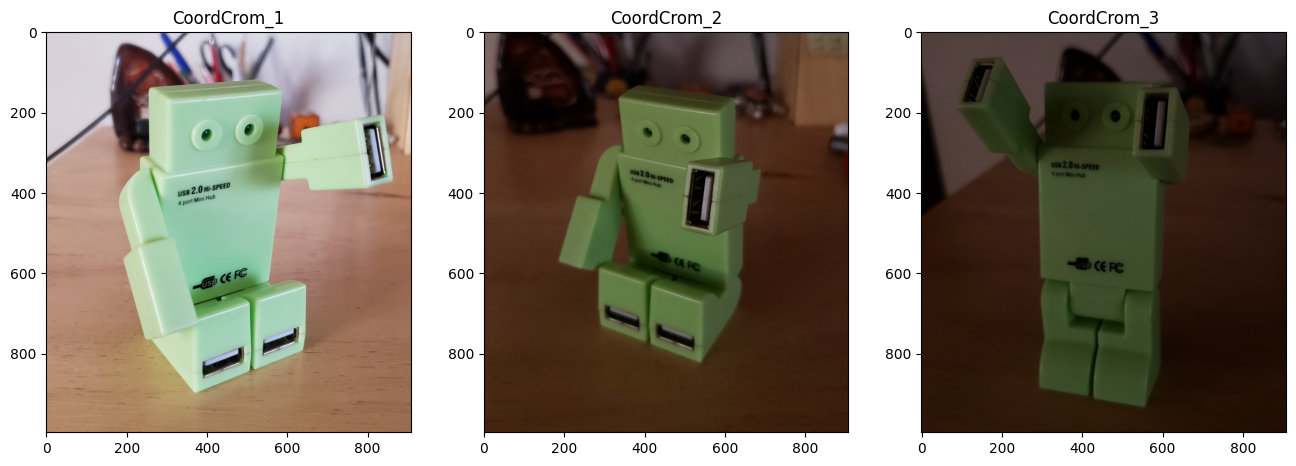

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(16, 10))

for i, img in enumerate(img_crom):
    plt.subplot(1, 3, i + 1) 
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(imgRGB)
    plt.title(f'CoordCrom_{i + 1}')


#### Transformación cromática

In [20]:
def coor_cromatica(img):
    img_crom = img.copy()
    im_r, im_g, im_b = cv.split(img_crom)
    R_G_B = img_crom.sum(axis=2)
    R_G_B[R_G_B == 0] = 1  # Evitar divisiones por cero
    im_r_crom = im_r / R_G_B
    im_g_crom = im_g / R_G_B
    im_b_crom = im_b / R_G_B
    img_crom = cv.merge((im_b_crom, im_g_crom, im_r_crom))

    return img_crom

In [21]:
img_crom_processed = [coor_cromatica(img) for img in img_crom]

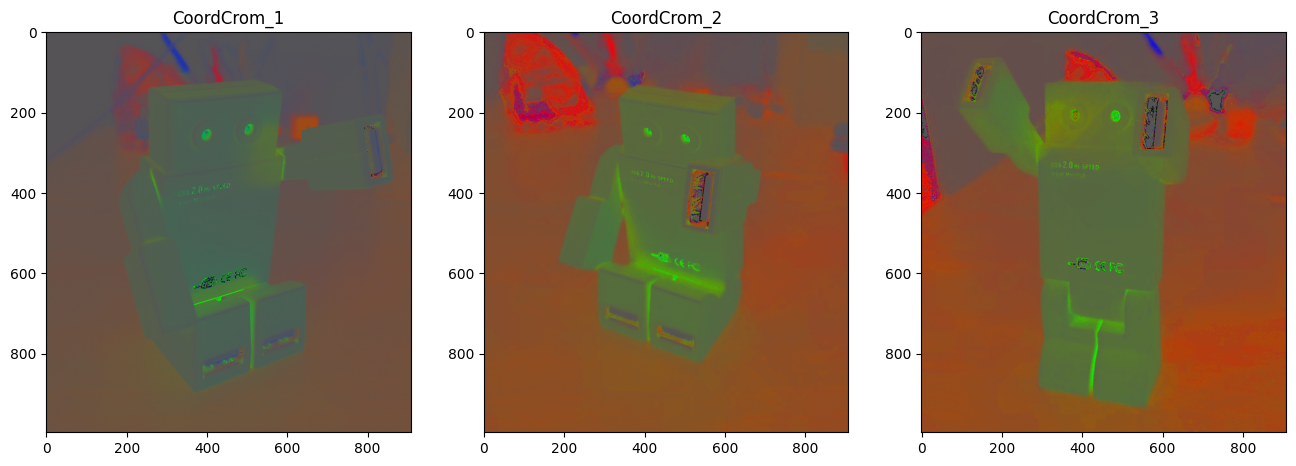

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(16, 10))

for i, img in enumerate(img_crom_processed):
    plt.subplot(1, 3, i + 1) 
    plt.imshow(img)
    plt.title(f'CoordCrom_{i + 1}')

#### Cargo las imágenes de la carpeta white_patch

In [23]:
img_blue = cv.imread('white_patch/wp_blue.jpg')
img_green = cv.imread('white_patch/wp_green.png')
img_green2 = cv.imread('white_patch/wp_green2.jpg')
img_red = cv.imread('white_patch/wp_red.png')
img_red2 = cv.imread('white_patch/wp_red2.jpg')
img_test_red = cv.imread('white_patch/test_red.png')
img_test_blue = cv.imread('white_patch/test_blue.png')
img_test_green = cv.imread('white_patch/test_green.png')

img_wp = [img_blue, img_green2, img_red2, img_green, img_red, img_test_red, img_test_blue, img_test_green]

#### White Patch

In [24]:
def white_patch(img):

    im_r, im_g, im_b = cv.split(img)

    max_r = np.max(im_r)
    max_g = np.max(im_g)
    max_b = np.max(im_b)

    im_r_corr = (im_r / max_r) * 255
    im_g_corr = (im_g / max_g) * 255
    im_b_corr = (im_b / max_b) * 255

    img_white_balanced = cv.merge((im_b_corr, im_g_corr, im_r_corr))

    return np.clip(img_white_balanced, 0, 255).astype(np.uint8) 

In [25]:
img_white_balanced = [white_patch(img) for img in img_wp]

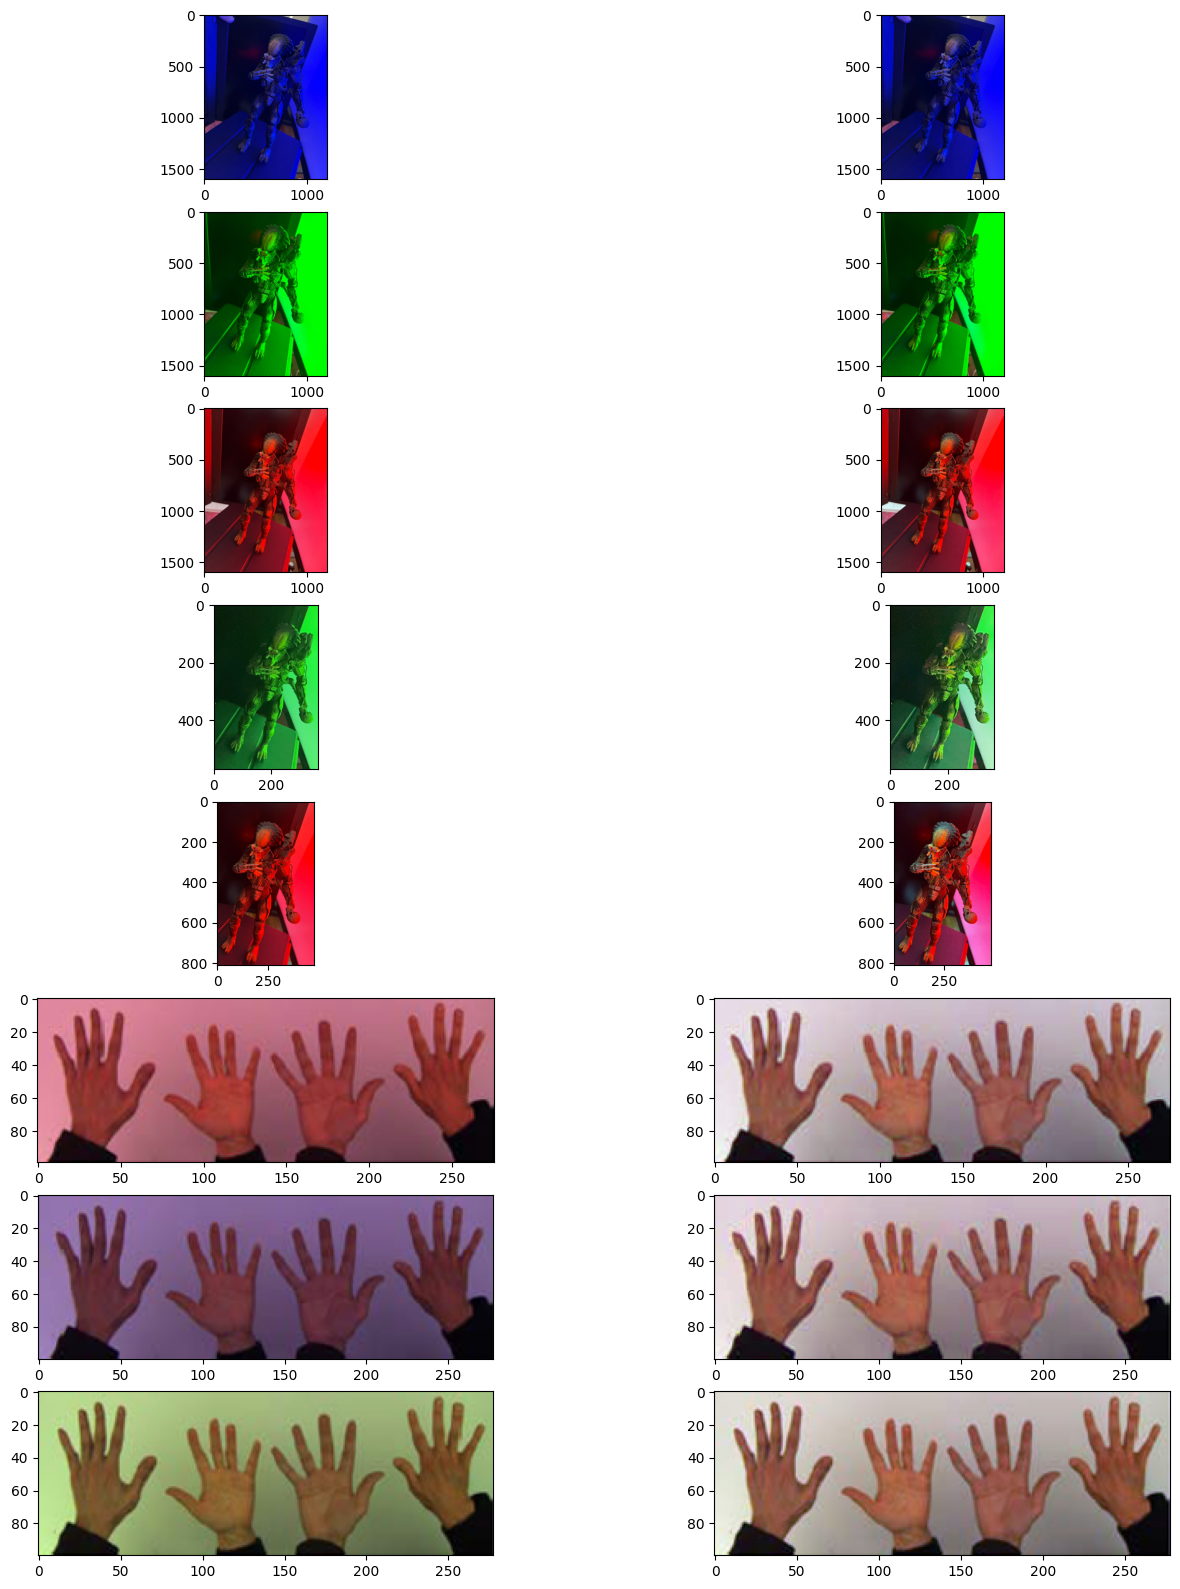

In [26]:
fig, axs = plt.subplots(8, 2, figsize=(16, 20))  

for i in range(8):
    img_wp_rgb = cv.cvtColor(img_wp[i], cv.COLOR_BGR2RGB)
    plt.subplot(8, 2, i * 2 + 1)
    plt.imshow(img_wp_rgb)

    plt.subplot(8, 2, i * 2 + 2)
    plt.imshow(img_white_balanced[i])


El algoritmo de Transformación Cromática nos permite liberarnos del contraste de la imagen, logrando identificar los objetos presentes en la misma. 
Por otro lado, el algoritmo de White Patch logra liberarnos de la influencia del color de la fuente de iluminación utilizada al capturar la imagen. Esta característica se hace más evidente en las imágenes de las manos, donde después de aplicar White Patch, obtenemos tres imágenes notablemente similares en términos de color. Es notorio que el tono de las manos, por ejemplo, es consistente con lo que se esperaría de la piel humana. Sin embargo, es importante señalar que este algoritmo puede ser limitado si alguno de los tres canales de color está saturado, ya que no permite una compensación efectiva en ese canal.

### Parte 2

In [27]:
img1_tp = cv.imread('img1_tp.png')
img2_tp = cv.imread('img2_tp.png')

img_tp = [img1_tp, img2_tp]

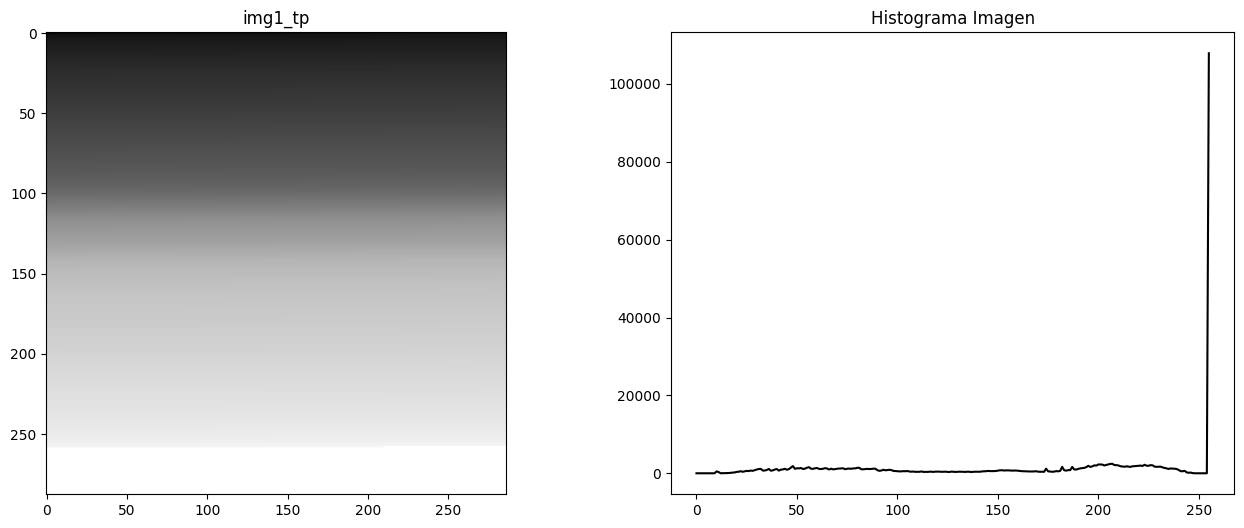

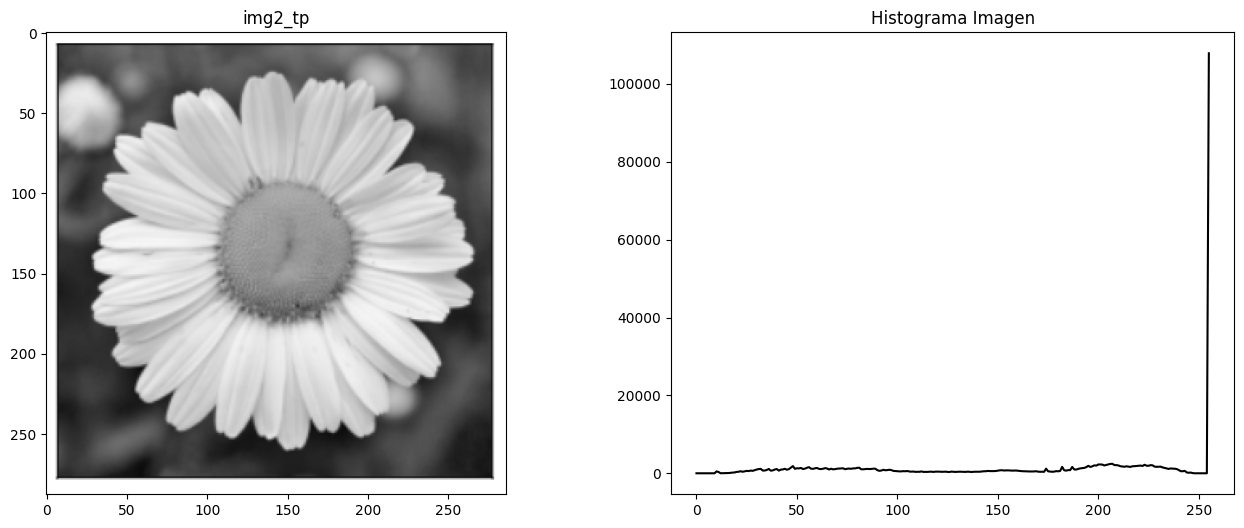

In [28]:
for i, img in enumerate(img_tp):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    imgGRAY = cv.cvtColor(img, cv.IMREAD_GRAYSCALE)
    plt.imshow(imgGRAY, cmap='gray')
    plt.title(f'img{i + 1}_tp')

    plt.subplot(1, 2, 2)
    hist, bins = np.histogram(imgGRAY.ravel(), 256, [0, 256])
    plt.plot(hist, color='black')
    plt.title('Histograma Imagen')
    
    plt.show()


Se optó por utilizar un histograma con 256 bins para obtener una mayor precisión al comparar ambas distribuciones. No obstante, resulta evidente que, a pesar de las notables diferencias en las imágenes, ambas comparten exactamente el mismo histograma. Esto sugiere que, en este caso específico, el histograma no constituiría un parámetro efectivo para emplear en algoritmos de detección de objetos o clasificación, ya que no aporta información útil. No obstante, en contextos diferentes, los histogramas podrían resultar útiles para verificar la presencia o ausencia de un objeto. Por lo tanto, la utilidad del histograma dependerá de la aplicación específica, y es esencial comprender el contexto para evaluar su eficacia.

In [29]:
segmentacion = cv.imread('segmentacion.png')

Text(0.5, 1.0, 'Segmentacion')

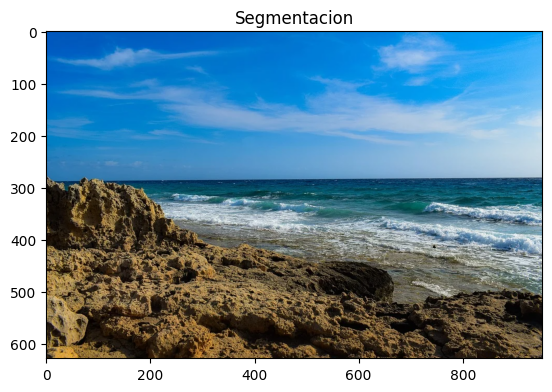

In [30]:
imgRGB = cv.cvtColor(segmentacion, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.title(f'Segmentacion')

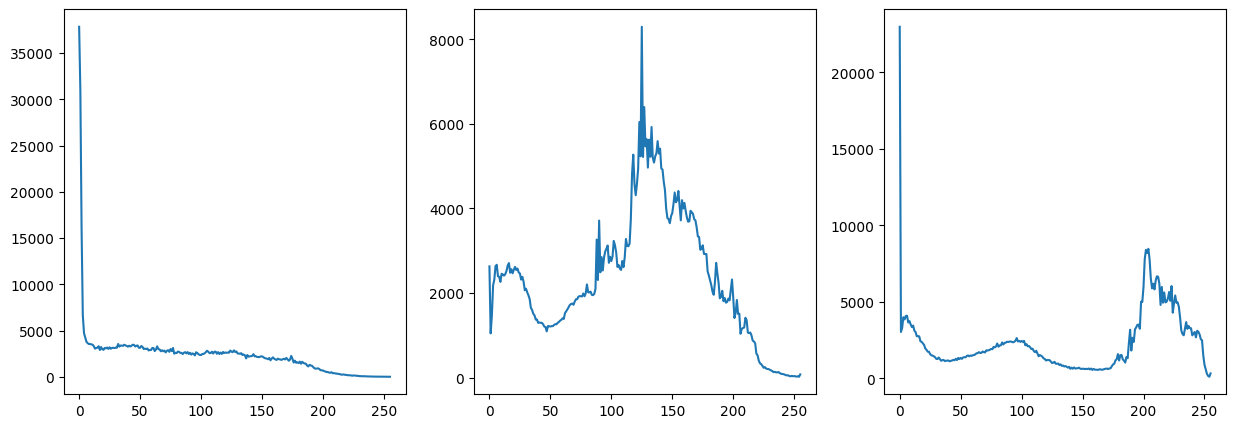

In [31]:
r_hist = cv.calcHist([imgRGB[:,:,0]], [0], mask=None, histSize= [256], ranges=[0,256])
g_hist = cv.calcHist([imgRGB[:,:,1]], [0], mask=None, histSize= [256], ranges=[0,256])
b_hist = cv.calcHist([imgRGB[:,:,2]], [0], mask=None, histSize= [256], ranges=[0,256])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(r_hist)
plt.subplot(1,3,2)
plt.plot(g_hist)
plt.subplot(1,3,3)
plt.plot(b_hist)

 La conversión de la imagen al espacio de color HSV es más beneficiona, ya que facilita el análisis de los límites entre los diferentes planos de la imagen, como el cielo, el agua y la tierra. Este enfoque en el espacio de color HSV proporciona una perspectiva más eficaz para la separación y la comprensión de los distintos componentes de la imagen.

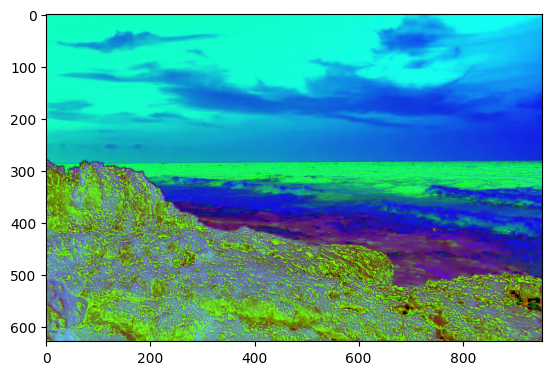

In [68]:
hsv_image = cv.cvtColor(imgRGB, cv.COLOR_BGR2HSV)
plt.imshow(hsv_image)

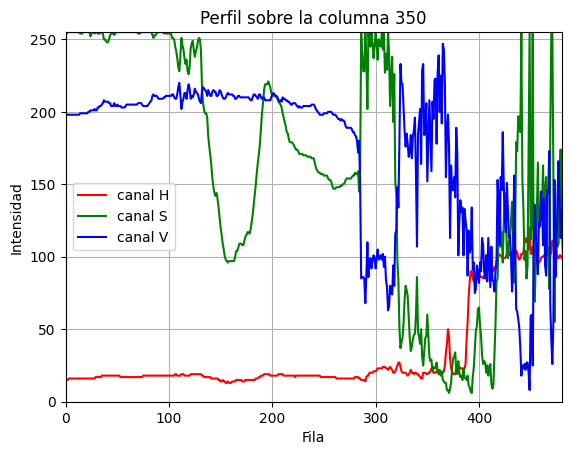

In [75]:
idx_col = 350
perfil_color = hsv_image[:,idx_col]
plt.plot(perfil_color[:,0], color='r', label='canal H')
plt.plot(perfil_color[:,1], color='g', label='canal S')
plt.plot(perfil_color[:,2], color='b', label='canal V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title(f'Perfil sobre la columna {idx_col}')
plt.grid()
plt.xlim(0, 480)
plt.ylim(0, 255)
plt.legend()
plt.show()

En el perfil de colores HSV, podemos ver que la linea del horizonte está bien marcada por una caída abrupta de la iluminancia de color (V). Esta caída se encuentra aproximadamente en el pixel 290.

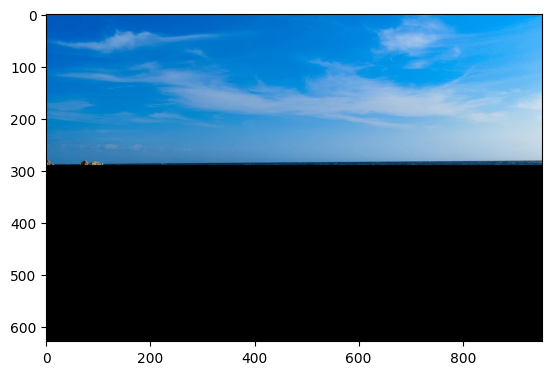

In [136]:
hue = np.array(hsv_image[:,:,0])
mask_sky = np.zeros((hue.shape[0], hue.shape[1]), dtype="uint8")
mask_sky[:290,:] = 255
sky_region = cv.bitwise_and(imgRGB, imgRGB, mask= mask_sky)
plt.imshow(sky_region)
plt.show()

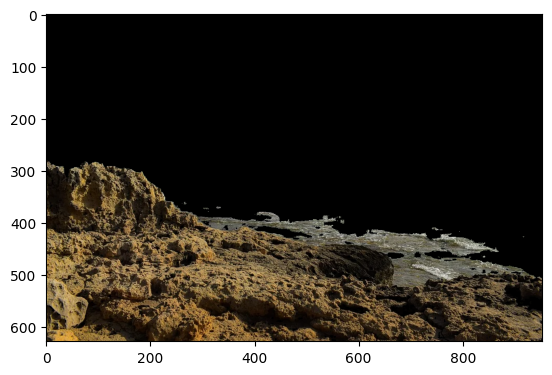

In [137]:
lower = np.array([80, 0, 0])
upper = np.array([120, 255, 255])

mask_mountains = cv.inRange(hsv_image, lower, upper)
mountain_region = cv.bitwise_and(imgRGB, imgRGB, mask=mask_mountains)
plt.imshow(mountain_region)

In [141]:
mask_combined = cv.bitwise_or(mask_mountains, mask_sky)
mask_rest = cv.bitwise_not(mask_combined)
rest_region = cv.bitwise_and(imgRGB, imgRGB, mask=mask_rest)

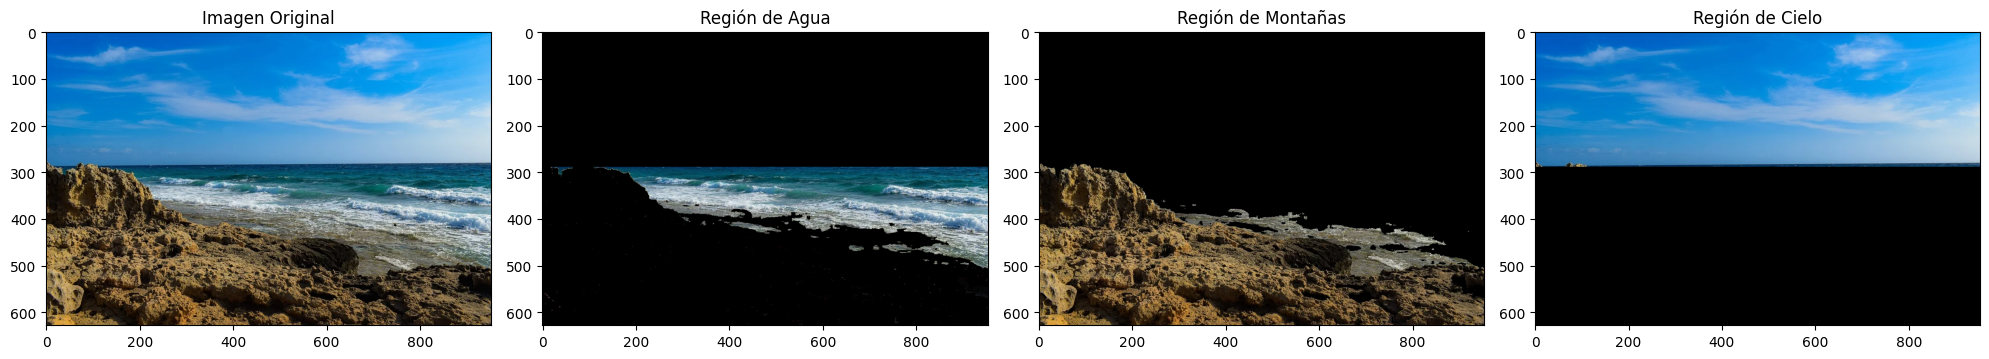

In [142]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(imgRGB)
axs[0].set_title('Imagen Original')

axs[1].imshow(rest_region)
axs[1].set_title('Región de Agua')

axs[2].imshow(mountain_region)
axs[2].set_title('Región de Montañas')

axs[3].imshow(sky_region)
axs[3].set_title('Región de Cielo')

plt.tight_layout()

plt.show()
